<a href="https://colab.research.google.com/github/ZhaoJiaxin107/Face_Recognition/blob/master/Facial_Augument.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os 
os.chdir('/content/drive/My Drive/Colab Notebooks/facial_keypoints')
!ls

Facial_Augument.ipynb		  fig.jpg
Facial_Detection_Augmentation.h5  haarcascade_frontalface_alt.xml
facial_detection_cv.ipynb	  test.csv
fig_detection.jpg		  training.csv
fig_detection.png


In [0]:
import numpy as np
import pandas as pd

In [0]:
from sklearn.model_selection import train_test_split

In [5]:
train_data = pd.read_csv('training.csv')
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [6]:
# check whether the attribute in the training dataset has null value
# True: The attribute has NAN value
# False: The attribute has no NAN value
train_data.isnull().any()

left_eye_center_x             True
left_eye_center_y             True
right_eye_center_x            True
right_eye_center_y            True
left_eye_inner_corner_x       True
left_eye_inner_corner_y       True
left_eye_outer_corner_x       True
left_eye_outer_corner_y       True
right_eye_inner_corner_x      True
right_eye_inner_corner_y      True
right_eye_outer_corner_x      True
right_eye_outer_corner_y      True
left_eyebrow_inner_end_x      True
left_eyebrow_inner_end_y      True
left_eyebrow_outer_end_x      True
left_eyebrow_outer_end_y      True
right_eyebrow_inner_end_x     True
right_eyebrow_inner_end_y     True
right_eyebrow_outer_end_x     True
right_eyebrow_outer_end_y     True
nose_tip_x                   False
nose_tip_y                   False
mouth_left_corner_x           True
mouth_left_corner_y           True
mouth_right_corner_x          True
mouth_right_corner_y          True
mouth_center_top_lip_x        True
mouth_center_top_lip_y        True
mouth_center_bottom_

So we can see many attributes in the training dataset had  null values, and we must deal with it.
https://zhuanlan.zhihu.com/p/35321806

处理空值的两种办法：
1.删除
df.dropna()
df.dropna(axis=0,how='any',thresh=None,subset=None,inplace=False)

axis代表删除整行或者整列,默认axis=0,也就是删除行
how默认为any,也就是删除任何含有空值的行、列
if how='all'，则会删除全部为空值的行/列

thresh可以用来限定删除有几个空值的行/列，if thresh=3,则删除有三个空值的行/列

subnet非常有用，如果想删除所有列A空值所在行：
df.dropna(axis=0,subnet=['A'])

2.填充 df.fillna()
df.fillna(value=None,method=None,axis=None,inplace=False,limit=None,downcast=None,**kwargs)

value可以是一个值（标量），比如我们用一列的均值来填充该列的所有空值
df['column_name'].fillna(value = df['column_name'].mean())

value也可以是dict,Series,甚至是DataFrame,比如我们可以用字典来实现对不同的列填充不同的值

df.fillna({'column_name_A':0,'column_name_B':100})

In [0]:
train_data.fillna(method='ffill',inplace=True) 
# inplace参数的取值：True、False
# True：直接修改原对象
# False：创建一个副本，修改副本，原对象不变（缺省默认）
# method参数的取值 ： {‘pad’, ‘ffill’,‘backfill’, ‘bfill’, None}, default None

# pad/ffill：用前一个非缺失值去填充该缺失值

# backfill/bfill：用下一个非缺失值填充该缺失值

# None：指定一个值去替换缺失值（缺省默认这种方式）

In [8]:
train_data.count() #count()非空元素计算

left_eye_center_x            7049
left_eye_center_y            7049
right_eye_center_x           7049
right_eye_center_y           7049
left_eye_inner_corner_x      7049
left_eye_inner_corner_y      7049
left_eye_outer_corner_x      7049
left_eye_outer_corner_y      7049
right_eye_inner_corner_x     7049
right_eye_inner_corner_y     7049
right_eye_outer_corner_x     7049
right_eye_outer_corner_y     7049
left_eyebrow_inner_end_x     7049
left_eyebrow_inner_end_y     7049
left_eyebrow_outer_end_x     7049
left_eyebrow_outer_end_y     7049
right_eyebrow_inner_end_x    7049
right_eyebrow_inner_end_y    7049
right_eyebrow_outer_end_x    7049
right_eyebrow_outer_end_y    7049
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          7049
mouth_left_corner_y          7049
mouth_right_corner_x         7049
mouth_right_corner_y         7049
mouth_center_top_lip_x       7049
mouth_center_top_lip_y       7049
mouth_center_bottom_lip_x    7049
mouth_center_b

We can see all the data has been filled.
Then we should deal with image column

fromstring(string, dtype=None, count=-1, sep=’’)
第一个参数string就是我们要处理的字符串，

dtype就是我们要转换的类型，默认为float64，

count表示要处理的字符串的长度，count默认为-1，为负值时按字符串的实际长度来处理

sep：当字符串中全为数字时，不管数字之间有没有分隔符，只要sep='',那么数字就按ascii的值解析；如果之间没有间隔，不管sep为不为空，数字也按ascii值解析；如果数字之间有间隔符， 而且sep=''，数字按ascii值解析；如果数字之间有间隔符，sep等于间隔符，数字解析为数字值；其中，空格不可以忽略，也作为一种间隔符

In [0]:
#np.fromstring()
#从字符串到Ascii码的转换
train_data['Image'] = train_data['Image'].apply(lambda im:np.fromstring(im,sep=' '))

In [10]:
train_data['Image'].head()

0    [238.0, 236.0, 237.0, 238.0, 240.0, 240.0, 239...
1    [219.0, 215.0, 204.0, 196.0, 204.0, 211.0, 212...
2    [144.0, 142.0, 159.0, 180.0, 188.0, 188.0, 184...
3    [193.0, 192.0, 193.0, 194.0, 194.0, 194.0, 193...
4    [147.0, 148.0, 160.0, 196.0, 215.0, 214.0, 216...
Name: Image, dtype: object

**Normalize Pixel Values**
For most image data, the pixel values are integers with values between 
0 and 255.

It is valid for images to have pixel values in the range 0-1 and images 
can be viewed normally.

This can be achieved by dividing all pixel values by the largest pixel value
that is 255. This is performed across all channels, regardless of the 
actual range of pixel values that are present in the image

In [0]:
X = np.vstack(train_data['Image'].values)/255 #np.vstack:按垂直方向（行顺序）堆叠数组构成一个新的数组

In [0]:
X = X.astype(np.float32)

In [13]:
print("data type:",X.dtype)
print("data size:",X.size)
print("data shape:",X.shape)

data type: float32
data size: 64963584
data shape: (7049, 9216)


In [0]:
y = train_data.drop(['Image'],axis = 1)
y=y.values

In [15]:
print(y.max())
print(y.min())

95.93564444440001
0.686592


**Data Standardization**

Standardization refers to shifting the distribution of each attribute to hava 
a mean of zero and a standard deviation of one

It is useful to standardlize attributes for a model that relies on the distribution of attributes such as Gaussian process.

In [0]:
y = (y-48)/18   #scale target coordination to [-1,1]
y = y.astype(np.float32)

Then we can see the target values have been transformed to standardization.

In [0]:
#The shuffle() method takes a sequence (list, string, or tuple) and reorganize the order of the items.
from sklearn.utils import shuffle
X,y = shuffle(X,y,random_state = 42)

In [18]:
print("X shape:",X.shape)
print("y shape",y.shape)

X shape: (7049, 9216)
y shape (7049, 30)


Parameters:	
*arrays : sequence of arrays or scipy.sparse matrices with same shape[0]
Python lists or tuples occurring in arrays are converted to 1D numpy arrays.

**test_size :** float, int, or None (default is None)

If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is automatically set to the complement of the train size. If train size is also None, test size is set to 0.25.

**train_size :** float, int, or None (default is None)

If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.

**random_state :** int or RandomState

Pseudo-random number generator state used for random sampling.

Returns:	
splitting : list of arrays, length=2 * len(arrays)

List containing train-test split of input array.

In [19]:
print(X.shape)
print(y.shape)

(7049, 9216)
(7049, 30)


In [20]:
X = X.reshape(-1,96,96,1)
X.shape

(7049, 96, 96, 1)

In [0]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2, random_state=42)

In [22]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.layers import MaxPooling2D,Conv2D,Flatten,Dropout
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


**Conv2D**

filter:integer,卷积核的数目（输出的维度）

kernel_size:单个整数或者由2个整数构成的list/tuple，卷积核的宽度和长度
      如果为单个整数，则表示在各个空间维度的相同长度

strides:单个整数或由2个整数构成的list/tuple,为卷积的步长。
    如为单个整数，则表示在各个空间维度的相同步长

padding:"valid","same"。"valid"只代表进行有效的卷积，即对边界数不处理
    "same"代表保留边界处的卷积结果

activation:激活函数，常见的激活函数有relu,leaky relu, sigmoid

**MaxPooling2D**

https://www.w3cschool.cn/tensorflow_python/tensorflow_python-ycgz2v16.html

pool_size:2个整数的整数tuple/list,(pool_height,pool_width)
     也可以是单个整数，以指定所有空间维度的相同值

strides:2个整数的整数tuple/list,指定池操作的步长
    也可以是单个整数，以指定所有空间维度的相同值

padding:一个字符串，表示填充方法,"valid"/"same"



**将Dropout(退出率)应用于输入.**

Dropout包括在每次更新期间随机将输入单位的分数rate设置为0,这有助于防止过度拟合(overfitting).保留的单位按比例1/(1 - rate)进行缩放,以便在训练时间和推理时间内它们的总和不变.

参数：

rate：退出率,介于0和1之间；例如rate=0.1,输出单位将减少10％.

**BatchNormalization**
批处理规范化指的是通过减少内部协变量转换来加速深度网络训练

加速训练过程；
可以使用较大的学习率；
允许在深层网络中使用sigmoid这种易导致梯度消失的激活函数；
具有轻微地正则化效果，以此可以降低dropout的使用。

Flatten层用来将输入“压平”，即把多维的输入一维化，常用在从卷积层到全连接层的过渡。Flatten不影响batch的大小。

Dense是Keras定义网络层的基本方法

这里定义了一个有500个节点，使用relu激活函数的神经层，注意定义第一层的时候需要制定数据输入的形状，即input_dim，这样才能让数据正常进入网络。

In [0]:
def CNN():
  model = Sequential()

  model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation = "relu",input_shape=(96,96,1)))
  model.add(Dropout(0.1))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding="valid"))
  model.add(BatchNormalization())

  model.add(Conv2D(32,5,activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())

  model.add(Conv2D(64,5,activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))
  model.add(BatchNormalization())

  model.add(Conv2D(128,3,activation="relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))
  model.add(Dropout(0.4))
  model.add(BatchNormalization())

  model.add(Flatten())

  model.add(Dense(500,activation = "relu"))
  model.add(Dropout(0.1))

  model.add(Dense(128,activation = "relu"))
  model.add(Dropout(0.1))

  model.add(Dense(30))

  model.summary()
  model.compile(optimizer='adam',loss='mse',metrics=['mae','accuracy'])

  return model

In [24]:
model = CNN()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 16)        80        
_________________________________________________________________
dropout_1 (Dropout)          (None, 96, 96, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 32)       

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
class FlippedImageDataGenerator(ImageDataGenerator):
  flip_indices = [(0,2),(1,3),(4,8),(5,9),(6,10),(7,11),(12,16),(13,17),(14,18),(15,19),(22,24),(23,25)]

  def next(self):
    X_batch,y_batch = super(FlippedImageDataGenerator,self).next()
    print(X_batch)
    batch_size = X_batch.shape[0]
    # choice(a, size=None, replace=True, p=None)
    # a为一个一维数据或者int的对象
    # size为随机选取出后的数据的类型，可以是一维，也可以是二维
    # replace=True 代表选取后可以放回，也就是说有可能会出现重复选取的数据
    # replace=False 代表选取后不放回，不会出现重复数据
    # p为选取的概率

    # 随机选择一些图像进行水平镜像（Flip）
    indices = np.random.choice(batch_size,batch_size/2,replace = False)
    X_batch[indices] = X_batch[indices,:,:,::-1]

    if y_batch is not None:
      y_batch[indices,::2] = y_batch[indices,::2] * (-1)

      # 对于有进行过水平镜像的图像，也把脸部关键坐标点进行调换
      for a,b in self.flip_indices:
        y_batch[indices,a],y_batch[indices,b] = (
            y_batch[indices,b],y_batch[indices,a]
        )

    return X_batch,y_batch

In [0]:
flipgen = FlippedImageDataGenerator()

In [28]:
history = model.fit_generator(flipgen.flow(X_train,y_train),samples_per_epoch = 50,epochs = 100,validation_data = (X_val,y_val))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=100, validation_data=(array([[[..., steps_per_epoch=1)`
  """Entry point for launching an IPython kernel.


Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 2.4839 - mae: 1.2843 - accuracy: 0.0312 - val_loss: 1.0747 - val_mae: 0.9034 - val_accuracy: 0.0064
Epoch 2/100
1/1 [==============================] - 0s 312ms/step - loss: 1.3128 - mae: 0.9100 - accuracy: 0.2188 - val_loss: 1.0600 - val_mae: 0.8978 - val_accuracy: 0.0057
Epoch 3/100
1/1 [==============================] - 0s 293ms/step - loss: 0.8611 - mae: 0.7321 - accuracy: 0.1562 - val_loss: 1.0467 - val_mae: 0.8919 - val_accuracy: 0.0028
Epoch 4/100
1/1 [==============================] - 0s 297ms/step - loss: 0.7805 - mae: 0.6950 - accuracy: 0.0625 - val_loss: 1.0320 - val_mae: 0.8854 - val_accuracy: 0.0050
Epoch 5/100
1/1 [==============================] - 0s 304ms/step - loss: 0.6723 - mae: 0.6530 - accuracy: 0.0625 - val_loss: 1.0134 - val_mae: 0.8773 - val_accuracy: 7.0922e-04
Epoch 6/100
1/1 [==============================] - 0s 300ms/step - loss: 0.6579 - mae: 0.6241 - accuracy: 0.0938 - val_loss: 0.9938 - 

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def plot_loss(hist,name,plt,RMSE_TF = False):
  loss = hist['loss']
  val_loss = hist['val_loss']

  if RMSE_TF:
    loss = np.sqrt(np.array(loss)) * 48
    val_loss = np.sqrt(np.array(val_loss)) * 48

  plt.plot(loss,"--",linewidth = 3,label = "training" + name)
  plt.plot(val_loss,linewidth = 3,label = "val" + name)

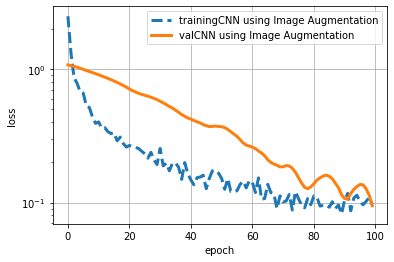

In [31]:
plot_loss(history.history,"CNN using Image Augmentation",plt)
plt.legend()
plt.grid()
#对数或者其他非线性坐标轴使用plt.xscale()来改变坐标轴的刻度
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [0]:
def plot_Acc(hist,name,plt):
  Acc = hist['accuracy']
  val_Acc = hist['val_accuracy']

  plt.plot(Acc,"--",linewidth = 3,label = "training " + name)
  plt.plot(val_Acc,linewidth = 3,label = "val " + name)

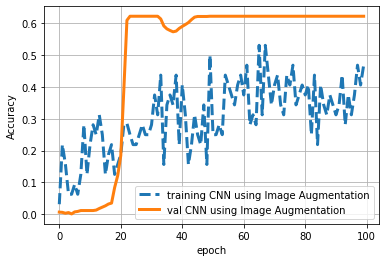

In [33]:
plot_Acc(history.history,"CNN using Image Augmentation",plt)
plt.legend()
plt.grid()
#plt.yscale('log')
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.show()

In [0]:
model.save('Facial_Detection_Augmentation.h5')

In [0]:
from keras.models import load_model
model = load_model('Facial_Detection_Augmentation.h5')

In [36]:
test_data = pd.read_csv('test.csv')
test_data.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [0]:
test_data.fillna(method='ffill',inplace=True)
test_data['Image'] = test_data['Image'].apply(lambda im:np.fromstring(im,sep = ' '))

In [38]:
print(test_data.count())

ImageId    1783
Image      1783
dtype: int64


In [0]:
X_test = np.vstack(test_data['Image'].values)/255

In [40]:
X_test = X_test.reshape(-1,96,96,1)
print(X_test.shape)
X_test = X_test.astype(np.float32)
print(X_test.dtype)

(1783, 96, 96, 1)
float32


In [0]:
y_test = model.predict(X_test)

add_subplot:https://towardsdatascience.com/subplots-in-matplotlib-a-guide-and-tool-for-planning-your-plots-7d63fa632857

add_subplot(nrows, ncols, index, **kwargs)

That would be 4 rows by 2 columns, and the 6th subplot.
fig.add_subplot(4,2,6)


这是numpy的切片操作，一般结构如num[a:b,c:d]，分析时以逗号为分隔符，
逗号之前为要取的num行的下标范围(a到b-1)，逗号之后为要取的num列的下标范围(c到d-1)；
前面是行索引，后面是列索引。
如果是这种num[:b,c:d]，a的值未指定，那么a为最小值0；
如果是这种num[a:,c:d]，b的值未指定，那么b为最大值；c、d的情况同理可得。

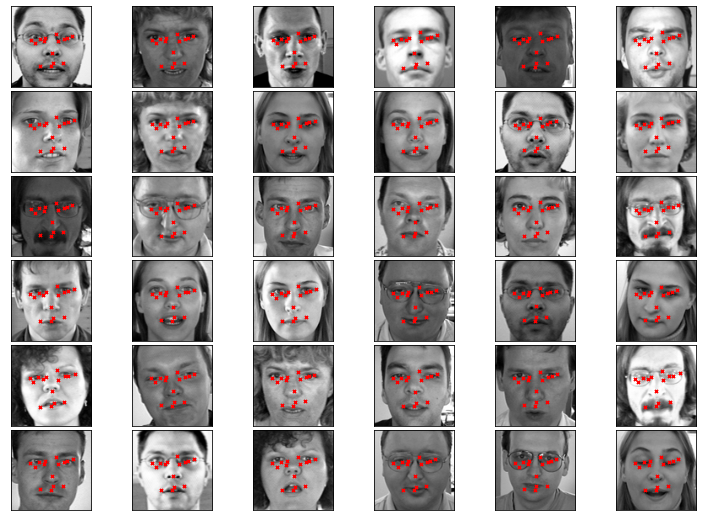

In [42]:
def plot_sample(x,y,axis):
  img = x.reshape(96,96)
  axis.imshow(img,cmap = 'gray')
  axis.scatter(y[0::2] * 18 + 48, y[1::2]*18+48, marker = 'x',s=10,color="red")

fig = plt.figure(figsize = (10,7))
fig.subplots_adjust(
  left=0, right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)

for i in range(36):
  axis = fig.add_subplot(6,6,i+1,xticks=[],yticks=[])
  plot_sample(X_test[i],y_test[i],axis)
plt.show()